#### 5/9/2017

This notebook contains the Amherst-specific figures and the Add Health School figures for School \#23.

In [1]:
## implemented LINK with solver='lbfgs'
from __future__ import division
from matplotlib.backends.backend_pdf import PdfPages
import os

os.chdir('/Users/kristen/Documents/gender_graph_code/code/0_analyze_FB100_AddHealth/')

## relevant libraries
execfile('../functions/python_libraries.py')

## processing datasets
execfile('../functions/create_adjacency_matrix.py') 
execfile('../functions/create_directed_adjacency_matrix.py')


execfile('../functions/parsing.py')
execfile('../functions/mixing.py')

## code for gender prediction 
execfile('../functions/LINK_finalized.py')
execfile('../functions/majority_vote.py')
execfile('../functions/ZGL.py')
execfile('../functions/benchmark_classifier.py')

## gender preference distribution
execfile('../functions/compute_null_distribution.py')

/Users/kristen/anaconda/lib/python2.7/site-packages/pandas/rpy/__init__.py:11: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  FutureWarning)


## Amherst College Network from FB100

In [2]:
## load Amherst only

## filename where relevant FB100 data is stored
fb100_file = '/Users/kristen/Dropbox/gender_graph_data/FB_processing_pipeline/data/0_original/'


for f in listdir(fb100_file):
    if f.endswith('.mat'):
        tag = f.replace('.mat', '')
        if (tag == 'Amherst41'):
            print tag
            input_file = path_join(fb100_file, f)
            A, metadata = parse_fb100_mat_file(input_file)

            adj_matrix_tmp = A.todense()
            gender_y_tmp = metadata[:,1] #gender
                
            gender_dict = create_dict(range(len(gender_y_tmp)), gender_y_tmp)
                
            (gender_y, adj_matrix_gender) = create_adj_membership(
                                    nx.from_numpy_matrix(adj_matrix_tmp), # graph
                                                           gender_dict,   # dictionary
                                                           0,             # val_to_drop, gender = 0 is missing
                                                           'yes',         # delete_na_cols, ie completely remove NA nodes from graph
                                                           0,             # diagonal
                                                           None,          # directed_type
                                                           'gender')      # gender
            
            gender_y = np.array(map(np.int,gender_y)) ## need np.int for machine precisions reasons

Amherst41


In [3]:
F_fb_label = 1
M_fb_label = 2

# illustrate overdispersion in Amherst

In [4]:
#F
in_F_degree = adj_matrix_gender[gender_y==F_fb_label,] * np.matrix((gender_y==F_fb_label)+0).T
total_F_degree = np.sum(adj_matrix_gender[gender_y==F_fb_label,] ,1)
h_F = np.mean(in_F_degree)/np.mean(total_F_degree)

#M
in_M_degree = adj_matrix_gender[gender_y==M_fb_label,] * np.matrix((gender_y==M_fb_label)+0).T
total_M_degree = np.sum(adj_matrix_gender[gender_y==M_fb_label,] ,1)
h_M = np.mean(in_M_degree)/np.mean(total_M_degree)


# Figure 1. Evidence of overdispersion in gender preferences on the Amherst College network.

### [confirmed 100K is enough iterations]

In [5]:
n_iter = 100000
d_iF = map(np.int,np.array(total_F_degree.T)[0])

mc_F = []
for j in range(n_iter):
    mc_F.append( np.random.binomial(n=map(np.int,np.array(total_F_degree.T)[0]), p=h_F)/d_iF)
    
mc_F_final = np.array(mc_F).flatten()


d_iM = map(np.int,np.array(total_M_degree.T)[0])
mc_M = []
for j in range(n_iter):
    mc_M.append( np.random.binomial(n=map(np.int,np.array(total_M_degree.T)[0]), p=h_M)/d_iM)
    
mc_M_final = np.array(mc_M).flatten()

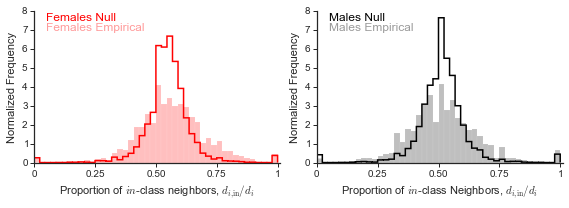

In [6]:
alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))
plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


ax1.hist(in_F_degree/total_F_degree,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='red',alpha=0.25)

ax1.hist(mc_F_final,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'red',histtype='step',
        color='white',alpha=1,lw=1.5)

ax1.set_ylabel('Normalized Frequency')
ax1.set_xlabel('Proportion of $in$-class neighbors, $d_{i,\\mathrm{in}}/d_i$')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,8)
ax1.set_xlim(0,1.01)

ax2.set_ylim(0,8)
ax2.set_xlim(0,1.01)
plt.setp(ax2, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
ax2.set_xticks([0,0.25, 0.5, 0.75, 1])
ax2.minorticks_on()
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


ax2.hist(in_M_degree/total_M_degree,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='black',alpha=0.25)
ax2.hist(mc_M_final,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'black',histtype='step',
        color='white',alpha=1,lw=1.5)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_xlabel('Proportion of $in$-class Neighbors, $d_{i,\\mathrm{in}}/d_i$')
ax2.set_ylabel('Normalized Frequency')

ax1.annotate('Females Null', xy=(0.05,7.5), 
                 color='red', alpha=1, size=12)
ax1.annotate('Females Empirical', xy=(0.05,7), 
                 color='red', alpha=alpha_empirical, size=12)
ax2.annotate('Males Null', xy=(0.05,7.5), 
                 color='black', alpha=1, size=12)
ax2.annotate('Males Empirical', xy=(0.05,7), 
                 color='black', alpha=alpha_empirical, size=12)
plt.tight_layout()
pp = PdfPages('../../figures/Facebook_Amherst_overdispersion_100k.pdf')
pp.savefig()
pp.close()

In [7]:
## Amherst stats
print np.sum((gender_y==F_fb_label)+0)
print np.sum((gender_y==M_fb_label)+0)
print np.shape(adj_matrix_gender)

1015
1017
(2032, 2032)


# Figure 3A. Comparison of 1-hop versus 2-hop classifiers on Amherst College.

### LINK

In [8]:
percent_initially_unlabelled = [0.99,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

In [9]:
(mean_accuracy_amherst, se_accuracy_amherst, 
 mean_micro_auc_amherst,se_micro_auc_amherst, mean_wt_auc_amherst_lbfgs,se_wt_auc_amherst)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(gender_y), ## gender labels 
                                                              np.matrix(adj_matrix_gender), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    solver='lbfgs',
                                                                                                    C=10e20),num_iter=10) 




0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


## 1-hop MV

In [10]:
(mean_accuracy_mv_amherst, se_accuracy_mv_amherst, 
 mean_micro_auc_mv_amherst,se_micro_auc_mv_amherst, 
 mean_wt_auc_mv_amherst,se_wt_auc_mv_amherst) =majority_vote_finalized(percent_initially_unlabelled,  
                                                                np.array(gender_y), 
                                                                np.array(adj_matrix_gender), 
                                                                       num_iter=10)



0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


## 2-hop MV

In [11]:
adj_amherst2= np.matrix(adj_matrix_gender)**2
adj_amherst2[range(adj_amherst2.shape[0]),range(adj_amherst2.shape[0])]=0 ## remove self-loops

In [ ]:
(mean_accuracy_mv2_amherst2, se_accuracy_mv2_amherst2, 
 mean_micro_auc_mv2_amherst2,se_micro_auc_mv2_amherst2, 
 mean_wt_auc_mv2_amherst2,se_wt_auc_mv2_amherst2) =majority_vote_finalized(percent_initially_unlabelled,  
                                                                np.array(gender_y), 
                                                                np.array(adj_amherst2), 
                                                                num_iter=10) 



0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


## ZGL

In [ ]:
(mean_accuracy_zgl_amherst, se_accuracy_zgl_amherst, 
mean_micro_auc_zgl_amherst,se_micro_auc_zgl_amherst, 
mean_wt_auc_zgl_amherst,se_wt_auc_zgl_amherst) =ZGL_finalized(np.array(adj_matrix_gender),
                                    np.array(gender_y),percent_initially_unlabelled, 
                                    num_iter=10)

0.99
0.95
0.9
0.8

## Baseline Classifier

In [ ]:
(mean_wt_auc_baseline_amherst,se_wt_auc_baseline_amherst) = random_classifier(np.array(adj_matrix_gender),
                                                                             np.array(gender_y),
                                                                            percent_initially_unlabelled,
                                                                             num_iter=10)

In [ ]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_amherst_lbfgs, 
            yerr=se_wt_auc_amherst, fmt='--o', capthick=2,
            alpha=0.6, elinewidth=3, color='black')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_amherst,
            yerr=se_micro_auc_zgl_amherst, fmt='--o', capthick=2,
            alpha=0.6, elinewidth=3, color='orange')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv_amherst,
            yerr=se_micro_auc_mv_amherst, fmt='--o', capthick=2,
            alpha=0.6, elinewidth=3, color='red')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv2_amherst2, 
            yerr=se_micro_auc_mv2_amherst2, fmt='--o', capthick=2,
                alpha=0.6, elinewidth=3, color='maroon')
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_amherst, 
            yerr=se_wt_auc_baseline_amherst, fmt='--o', capthick=2,
           alpha=0.6, elinewidth=3, color='gray')
        
        grid[i].set_ylim(0.3,1.1)
        grid[i].set_xlim(0,101)
        grid[i].annotate('LINK', xy=(3, 0.99), 
                 color='black', alpha=1, size=12)
        grid[i].annotate('2-hop MV', xy=(3, 0.96), 
                 color='maroon', alpha=1, size=12)
        grid[i].annotate('1-hop MV', xy=(3, 0.93), 
                 color='red', alpha=1, size=12)
        grid[i].annotate('ZGL', xy=(3, 0.90), 
                 color='orange', alpha=1, size=12)
        grid[i].annotate('Baseline', xy=(3, 0.87), 
                 color='gray', alpha=1, size=12)
        grid[i].set_ylim(0.49,1.01)
        grid[i].set_xlim(0,100)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled')
        grid[i].set_ylabel('AUC')

plt.setp(ax1, xticks=[0,25, 50, 75, 100], xticklabels=['0', '25', '50', '75', '100'])
grid[0].set_xticks([0,25, 50, 75, 100])
grid[0].set_yticks([ 0.4, 0.5,0.6,0.7,0.8,0.9,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

pp = PdfPages('../../figures/Amherst_College_Inference.pdf')
pp.savefig()
pp.close()

## SI Figure S5/6. regularization for LINK

### l2

0
1
2


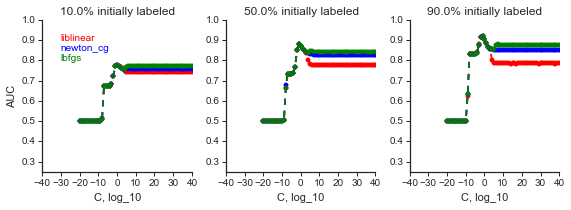

In [35]:
percent_initially_unlabelled = np.array([0.9,0.5,0.1])
percent_initially_labelled = 1-percent_initially_unlabelled
%matplotlib inline
f, (ax1, ax2,ax3) = plt.subplots(1, 3, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))
for i in range(len(percent_initially_unlabelled)):
    print i
    k_fold = cross_validation.ShuffleSplit(len(gender_y), n_iter=1,
                                                test_size=percent_initially_unlabelled[i],
                                                random_state=10)

    for k, (train, test) in enumerate(k_fold):
        ## vary C values
        C_vals = [10**x for x in range(-20,100)]

        ## vary solver types
        solver_type = np.array(['liblinear',
                                   'newton-cg',
                                   'lbfgs'])

        liblinear_AUC = []
        newton_cg_AUC = []
        lbfgs_AUC = []
        for j in range(len(C_vals)):
            for m in range(len(solver_type)):
                clf = linear_model.LogisticRegression(penalty='l2',
                                                    C=C_vals[j],
                                                    solver =solver_type[m])
                clf.fit(adj_matrix_gender[train], np.ravel(gender_y[train])) # spot-check fitted on training data


                pred = clf.predict(adj_matrix_gender[train]) # spot-check fitted on testing data
                prob = clf.predict_proba(adj_matrix_gender[test])

                if solver_type[m]=='liblinear':
                    liblinear_AUC.append(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                                                    prob[:,1],average='weighted'))
                if solver_type[m]=='newton-cg':
                    newton_cg_AUC.append(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                                                    prob[:,1],average='weighted'))
                if solver_type[m]=='lbfgs':
                    lbfgs_AUC.append(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                                                    prob[:,1],average='weighted'))
    if i==0:
        ax1.minorticks_on()
        ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        ax1.set_xlabel('C, log_10')
        ax1.scatter(range(-20,100), liblinear_AUC, color='red')#,'.r-')
        ax1.plot(range(-20,100), liblinear_AUC, 'r--')
        ax1.scatter(range(-20,100), newton_cg_AUC, color='blue')#,'.b-')
        ax1.plot(range(-20,100), newton_cg_AUC, 'b--')
        ax1.scatter(range(-20,100), lbfgs_AUC, color='green')#,'.g-')
        ax1.plot(range(-20,100), lbfgs_AUC, 'g--')
        ax1.annotate('liblinear', xy=(-30,0.90), color = 'red')
        ax1.annotate('newton_cg', xy=(-30,0.85), color = 'blue')
        ax1.annotate('lbfgs', xy=(-30,0.8), color = 'green')
        ax1.spines["right"].set_visible(False)
        ax1.spines["top"].set_visible(False)
        ax1.set_title(str(percent_initially_labelled[i]*100) +'% initially labeled')
        ax1.set_ylabel('AUC')
        ax1.set_ylim(0.25,1)
        ax1.set_xlim(-40,40)

    if i==1:
        ax2.scatter(range(-20,100), liblinear_AUC, color='red')#,'.r-')
        ax2.plot(range(-20,100), liblinear_AUC, 'r--')
        ax2.minorticks_on()
        ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        ax2.set_xlabel('C, log_10')
        ax2.scatter(range(-20,100), newton_cg_AUC, color='blue')#,'.b-')
        ax2.plot(range(-20,100), newton_cg_AUC, 'b--')
        ax2.scatter(range(-20,100), lbfgs_AUC, color='green')#,'.g-')
        ax2.plot(range(-20,100), lbfgs_AUC, 'g--')
        ax2.spines["right"].set_visible(False)
        ax2.spines["top"].set_visible(False)
        ax2.set_title(str(percent_initially_labelled[i]*100) +'% initially labeled')
        ax2.set_ylim(0.25,1)
        ax2.set_xlim(-40,40)


    if i==2:
        ax3.scatter(range(-20,100), liblinear_AUC, color='red')#,'.r-')
        ax3.plot(range(-20,100), liblinear_AUC, 'r--')
        ax3.scatter(range(-20,100), newton_cg_AUC, color='blue')#,'.b-')
        ax3.plot(range(-20,100), newton_cg_AUC, 'b--')
        ax3.minorticks_on()
        ax3.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        ax3.set_xlabel('C, log_10')
        ax3.scatter(range(-20,100), lbfgs_AUC, color='green')#,'.g-')
        ax3.plot(range(-20,100), lbfgs_AUC, 'g--')
        ax3.spines["right"].set_visible(False)
        ax3.spines["top"].set_visible(False)
        ax3.set_title(str(percent_initially_labelled[i]*100) +'% initially labeled')
        ax3.set_ylim(0.25,1)
        ax3.set_xlim(-40,40)
    plt.tight_layout()
    pp = PdfPages('../../figures/FB_Amherst_sensitivity_to_C.pdf')
    pp.savefig()
    pp.close()    

### l1

0
1
2


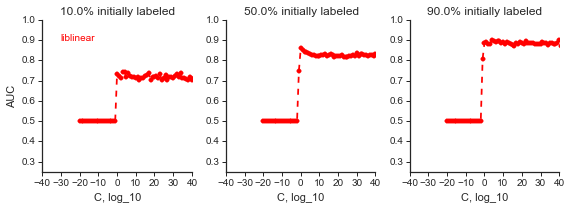

In [36]:
## spotcheck_only
%matplotlib inline
f, (ax1, ax2,ax3) = plt.subplots(1, 3, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))
for i in range(len(percent_initially_unlabelled)):
    print i
    k_fold = cross_validation.ShuffleSplit(len(gender_y), n_iter=1,
                                                test_size=percent_initially_unlabelled[i],
                                                random_state=0)


    for k, (train, test) in enumerate(k_fold):
        ## vary C values
        C_vals = [10**x for x in range(-20,100)]

        ## vary solver types
        solver_type = np.array(['liblinear'])
        liblinear_AUCl1 = []
        for j in range(len(C_vals)):
            for m in range(len(solver_type)):
                clf = linear_model.LogisticRegression(penalty='l1',
                                                    C=C_vals[j],
                                                    solver =solver_type[m])
                clf.fit(adj_matrix_gender[train], np.ravel(gender_y[train])) # spot-check fitted on training data


                pred = clf.predict(adj_matrix_gender[train]) # spot-check fitted on testing data
                prob = clf.predict_proba(adj_matrix_gender[test])

                if solver_type[m]=='liblinear':
                    liblinear_AUCl1.append(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                                                    prob[:,1],average='weighted'))
               
           
    if i==0:
        ax1.scatter(range(-20,100), liblinear_AUCl1, color='red')#,'.r-')
        ax1.plot(range(-20,100), liblinear_AUCl1, 'r--')

        ax1.minorticks_on()
        ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        ax1.set_xlabel('C, log_10')
        ax1.annotate('liblinear', xy=(-30,0.90), color = 'red')
        ax1.spines["right"].set_visible(False)
        ax1.spines["top"].set_visible(False)
        ax1.set_title(str(percent_initially_labelled[i]*100) +'% initially labeled')
        ax1.set_ylabel('AUC')
        ax1.set_ylim(0.25,1)
        ax1.set_xlim(-40,40)
        
    if i==1:
        ax2.scatter(range(-20,100), liblinear_AUCl1, color='red')#,'.r-')
        ax2.plot(range(-20,100), liblinear_AUCl1, 'r--')
        ax2.spines["right"].set_visible(False)
        ax2.spines["top"].set_visible(False)
        ax2.set_title(str(percent_initially_labelled[i]*100) +'% initially labeled')
        ax2.set_ylim(0.25,1)
        ax2.set_xlim(-40,40)
        ax2.minorticks_on()
        ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        ax2.set_xlabel('C, log_10')

    if i==2:
        ax3.scatter(range(-20,100), liblinear_AUCl1, color='red')#,'.r-')
        ax3.plot(range(-20,100), liblinear_AUCl1, 'r--')
        ax3.spines["right"].set_visible(False)
        ax3.spines["top"].set_visible(False)
        ax3.set_title(str(percent_initially_labelled[i]*100) +'% initially labeled')
        ax3.set_ylim(0.25,1)
        ax3.set_xlim(-40,40)
        ax3.minorticks_on()
        ax3.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        ax3.set_xlabel('C, log_10')
    plt.tight_layout()
    pp = PdfPages('../../figures/FB_Amherst_sensitivity_to_C_l1.pdf')
    pp.savefig()
    pp.close()

## SI Figure S7. separability on Amherst College

In [10]:
def LINK_training(num_unlabeled, membership_y, feature_x, clf, num_iter, cv_setup=None):
    mean_accuracy = []
    se_accuracy = []
    mean_micro_auc = []
    se_micro_auc = []
    mean_wt_auc = []
    se_wt_auc = []
    
        
    for i in range(len(num_unlabeled)):
        print num_unlabeled[i]
        if cv_setup=='stratified':
            k_fold = cross_validation.StratifiedShuffleSplit((membership_y), n_iter=num_iter,
                                               test_size=num_unlabeled[i],
                                               random_state=0)
        else:
            k_fold = cross_validation.ShuffleSplit(len(membership_y), n_iter=num_iter,
                                                         test_size=num_unlabeled[i],
                                                         random_state=0)
        accuracy = []
        micro_auc = []
        wt_auc = []
        for k, (train, test) in enumerate(k_fold):
            clf.fit(feature_x[train], np.ravel(membership_y[train]))
            
            # predicted labels
            pred = clf.predict(feature_x[train])
            prob = clf.predict_proba(feature_x[train])

            accuracy.append(metrics.accuracy_score(membership_y[train], pred,  normalize = True))
                                                                                 
            # auc scores
            if len(np.unique(membership_y))>2:
                micro_auc.append(metrics.roc_auc_score(label_binarize(membership_y[train],
                                                                      np.unique(membership_y)), prob,  average = 'micro'))
                wt_auc.append(metrics.roc_auc_score(label_binarize(membership_y[train],
                                                                   np.unique(membership_y)), prob,
                                                                                                                             average = 'weighted'))
            else:
                micro_auc.append(metrics.roc_auc_score(label_binarize(membership_y[train],
                                                                      np.unique(membership_y)),
                                                                        prob[:,1],average='micro'))
                wt_auc.append(metrics.roc_auc_score(label_binarize(membership_y[train],
                                                                   np.unique(membership_y)),
                                                                            prob[:,1],average='weighted'))
    
        mean_accuracy.append(np.mean(accuracy))
        se_accuracy.append(np.std(accuracy))

        mean_micro_auc.append(np.mean(micro_auc))
        se_micro_auc.append(np.std(micro_auc))
        mean_wt_auc.append(np.mean(wt_auc))
        se_wt_auc.append(np.std(wt_auc))

    return(mean_accuracy, se_accuracy, mean_micro_auc,se_micro_auc, mean_wt_auc,se_wt_auc)

In [13]:
percent_initially_unlabelled = [0.99,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

In [14]:
(t1,t1,
t1, t2, mean_auc_l2_unregularized_training_C100, se_auc_l2_unregularized_training_C100)= LINK_training(
    percent_initially_unlabelled,  gender_y,
                                                            adj_matrix_gender,
                                                            clf = linear_model.LogisticRegression(
        penalty='l2',C=10e20, solver='lbfgs'), 
                                                                             num_iter=10, cv_setup=None)

0.99
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


In [15]:
C_array = np.logspace(-5, 5, num=50, endpoint=True)

In [16]:
(t1,t1,
t1, t2, mean_auc_l2_regularized_training, se_auc_l2_regularized_training)= LINK_training(
    percent_initially_unlabelled,  
                                                                                         gender_y,
                                                            adj_matrix_gender,
                                                            clf = linear_model.LogisticRegressionCV(
        C_array,penalty='l2',solver='lbfgs'), 
                                                                             num_iter=10, cv_setup=None)

0.99
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


In [17]:
(t1,t1,
t1, t2, mean_auc_l2_unregularized, se_auc_l2_unregularized)= LINK(percent_initially_unlabelled,  gender_y,
                                                            adj_matrix_gender,
                                                            clf = linear_model.LogisticRegression(
        penalty='l2',C=10e20, solver='lbfgs'), 
                                                                    num_iter=10, cv_setup=None)

0.99
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


In [18]:
(t1,t1,
t1, t2, mean_auc_l2_regularized, se_auc_l2_regularized)= LINK(percent_initially_unlabelled,  gender_y,
                                            adj_matrix_gender,
                                            clf = linear_model.LogisticRegressionCV(C_array,penalty='l2',
                                                                                    solver='lbfgs',cv=5), 
                                                                    num_iter=10, cv_setup=None)

0.99
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


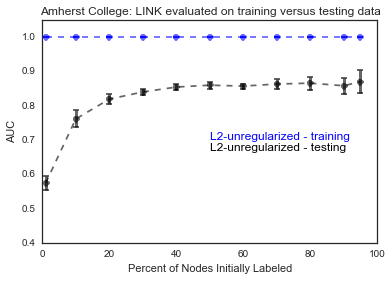

In [20]:
%matplotlib inline

plt.errorbar(percent_initially_labelled*100, mean_auc_l2_unregularized, 
                     yerr=se_auc_l2_unregularized, fmt='--o', capthick=2,
                     alpha=0.6, elinewidth=3, color='black')

plt.errorbar(percent_initially_labelled*100, mean_auc_l2_unregularized_training_C100, 
                     yerr=se_auc_l2_unregularized_training_C100, fmt='--o', capthick=2,
                     alpha=0.6, elinewidth=3, color='blue')

plt.title('Amherst College: LINK evaluated on training versus testing data')

plt.annotate('L2-unregularized - testing', xy=(50, 0.67), 
             color='black', alpha=1, size=12)

plt.annotate('L2-unregularized - training', xy=(50, 0.7), 
             color='blue', alpha=1, size=12)

plt.ylim(*(0.4,1.05))
plt.xlabel('Percent of Nodes Initially Labeled')
plt.ylabel('AUC')
pp = PdfPages('../../figures/Amherst_LINK_training_testing_separability.pdf')
pp.savefig()
pp.close()

# illustrate overdispersion in Add Health School #23

In [30]:
add_health_file = '/Users/kristen/Dropbox/gender_graph_data/add-health/converted_gml/' ## location of pajek-->gml files

In [24]:
for f in listdir(add_health_file):
    if f.endswith('.gml') and f=='comm23.gml': 
        tag = f.replace('.gml', '')
        print tag

        id = re.findall(r'\d+', f)
        print "Processing %s..." % f

        # directed graph
        ah_graph_directed = nx.read_gml(add_health_file+f)

        # for mutual links
        t1 = nx.adj_matrix(ah_graph_directed).todense()
        t2 = np.copy(t1.T)
        final = ((t1+t2) > 0)+0
        
        # undirected graph
        ah_graph_tmp = nx.read_gml(add_health_file+f)
        ah_graph_undirected = ah_graph_tmp.to_undirected()
            
        ## Add Health -- Undirected: Either In- or Out- Link
        (ah_gender_both, adj_gender_both) = create_adj_membership(nx.from_numpy_matrix(final),
                                                                   nx.get_node_attributes(ah_graph_directed, 'comm' + str(id[0]) +'sex'),
                                                                   0,
                                                                   'yes',
                                                                   0,
                                                                   None, # change adjacency matrix type: out == out-link, in == in-link, any1 == undirected
                                                                   'gender')
  
        ah_gender_both = np.array(map(np.int,ah_gender_both))

        (ah_gender_undirected, adj_directed_gender_undirected) = create_adj_membership(nx.from_numpy_matrix(final),
                                                                   nx.get_node_attributes(ah_graph_directed, 'comm' + str(id[0]) +'sex'),
                                                                   0,
                                                                   'yes',
                                                                   0,
                                                                   None, # change adjacency matrix type: out == out-link, in == in-link, any1 == undirected
                                                                   'gender')
        ah_gender_undirected = np.array(map(np.int,ah_gender_undirected))


        #in
        (ah_gender_in, adj_gender_in) = create_directed_adj_membership(ah_graph_directed,
                                                                nx.get_node_attributes(ah_graph_directed, 'comm' + str(id[0]) +'sex'), ## fix for non-mutual links here
                                                                   0,
                                                                   'yes',
                                                                   0,
                                                                   'in', # change adjacency matrix type: out == out-link, in == in-link, any1 == undirected
                                                                   'gender')
        ah_gender_in = np.array(map(np.int,ah_gender_in))


        #out-link
        (ah_gender_out, adj_gender_out) = create_directed_adj_membership(ah_graph_directed,
                                                                nx.get_node_attributes(ah_graph_directed, 
                                                                                       'comm' + str(id[0]) +'sex'), ## fix for non-mutual links here
                                                                   0,
                                                                   'yes',
                                                                   0,
                                                                   'out', # change adjacency matrix type: out == out-link, in == in-link, any1 == undirected
                                                                   'gender')
        ah_gender_out = np.array(map(np.int,ah_gender_out))


comm23
Processing comm23.gml...


# Null Distribution for Add Health

In [25]:
add_health_null =  compute_null_distribution(adj_directed_gender_undirected, 
                                ah_gender_undirected, 
                                100000)

In [31]:
add_health_obs = compute_observed_same_total_degree(adj_directed_gender_undirected, 
                                ah_gender_undirected)

In [32]:
print np.unique(ah_gender_undirected)

[1 2]


# SI Figure S8. 

### undirected graph

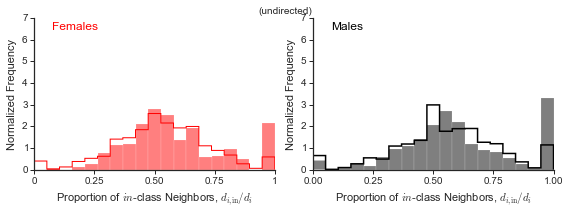

In [33]:
%matplotlib inline
nbins = 20
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))
ax1.hist(add_health_obs[1],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='red',alpha=0.5)
plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax2.set_xticks([0,0.25, 0.5, 0.75, 1])
ax2.minorticks_on()
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax2.set_ylabel('Normalized Frequency')
ax1.set_ylabel('Normalized Frequency')
ax2.set_xlabel('Proportion of $in$-class Neighbors, $d_{i,\\mathrm{in}}/d_i$')
ax1.set_xlabel('Proportion of $in$-class Neighbors, $d_{i,\\mathrm{in}}/d_i$')


ax1.hist(add_health_null[1],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'red',histtype='step',
        color='white',alpha=1,lw=1)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,7)
ax2.set_ylim(0,7)



ax2.hist(add_health_obs[0],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='black',alpha=0.5)

ax2.hist(add_health_null[0],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'black',histtype='step',
        color='white',alpha=1,lw=1.5)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)



#f.text(0.5, 0.01, 'Proportion of $in$-class degrees, $d_{i,in}/d_i$', ha='center',size=10)
f.text(0.5, 0.95, '(undirected)', ha='center',size=10)
ax1.annotate('Females', xy=(0.08,6.5), 
                 color='red', alpha=1, size=12)

ax2.annotate('Males', xy=(0.08,6.5), 
                 color='black', alpha=1, size=12)


plt.tight_layout()


pp = PdfPages('../../figures/Add_Health_23_undirected_overdispersion_100k.pdf')
pp.savefig()
pp.close()

## in-directed

In [36]:
add_health_null =  compute_null_distribution(adj_gender_in, 
                                ah_gender_in, 
                                100000)
add_health_obs = compute_observed_same_total_degree(adj_gender_in, 
                                ah_gender_in)

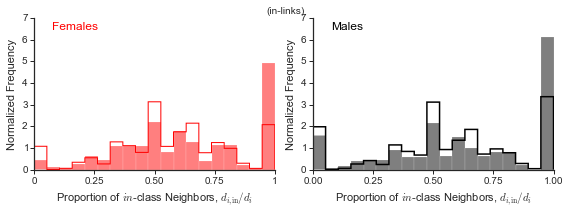

In [39]:
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))
ax1.hist(add_health_obs[1],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='red',alpha=0.5)

ax1.hist(add_health_null[1],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'red',histtype='step',
        color='white',alpha=1,lw=1)
plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax2.set_xticks([0,0.25, 0.5, 0.75, 1])
ax2.minorticks_on()
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax2.set_ylabel('Normalized Frequency')
ax1.set_ylabel('Normalized Frequency')
ax2.set_xlabel('Proportion of $in$-class Neighbors, $d_{i,\\mathrm{in}}/d_i$')
ax1.set_xlabel('Proportion of $in$-class Neighbors, $d_{i,\\mathrm{in}}/d_i$')

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,7)
ax2.set_ylim(0,7)



ax2.hist(add_health_obs[0],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='black',alpha=0.5)

ax2.hist(add_health_null[0],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'black',histtype='step',
        color='white',alpha=1,lw=1.5)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

f.text(0.5, 0.95, '(in-links)', ha='center',size=10)
ax1.annotate('Females', xy=(0.08,6.5), 
                 color='red', alpha=1, size=12)

ax2.annotate('Males', xy=(0.08,6.5), 
                 color='black', alpha=1, size=12)


plt.tight_layout()


pp = PdfPages('../../figures/Add_Health_23_indirected_overdispersion_100k.pdf')
pp.savefig()
pp.close()

## out-directed

In [40]:
add_health_null =  compute_null_distribution(adj_gender_out, 
                                ah_gender_out, 
                                100000)
add_health_obs = compute_observed_same_total_degree(adj_gender_out, 
                                ah_gender_out)




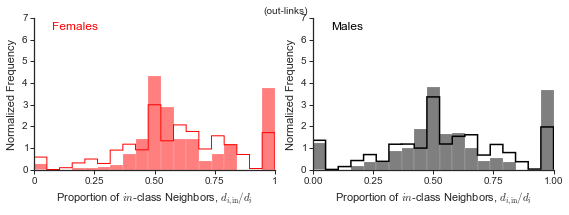

In [41]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))
ax1.hist(add_health_obs[1],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='red',alpha=0.5)

ax1.hist(add_health_null[1],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'red',histtype='step',
        color='white',alpha=1,lw=1)
plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax2.set_xticks([0,0.25, 0.5, 0.75, 1])
ax2.minorticks_on()
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax2.set_ylabel('Normalized Frequency')
ax1.set_ylabel('Normalized Frequency')
ax2.set_xlabel('Proportion of $in$-class Neighbors, $d_{i,\\mathrm{in}}/d_i$')
ax1.set_xlabel('Proportion of $in$-class Neighbors, $d_{i,\\mathrm{in}}/d_i$')


#ax1.set_ylabel('Frequency')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,7)
ax2.set_ylim(0,7)


ax2.hist(add_health_obs[0],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='black',alpha=0.5)

ax2.hist(add_health_null[0],
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'black',histtype='step',
        color='white',alpha=1,lw=1.5)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

f.text(0.5, 0.95, '(out-links)', ha='center',size=10)
ax1.annotate('Females', xy=(0.08,6.5), 
                 color='red', alpha=1, size=12)

ax2.annotate('Males', xy=(0.08,6.5), 
                 color='black', alpha=1, size=12)


plt.tight_layout()


pp = PdfPages('../../figures/Add_Health_23_outdirected_overdispersion_100k.pdf')
pp.savefig()
pp.close()

In [43]:
percent_initially_unlabelled = [0.98,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

## LINK 

In [44]:
#undirected
(mean_accuracy_ah_both, se_accuracy_ah_both, 
 mean_micro_auc_ah_both,se_micro_auc_ah_both, mean_wt_auc_ah_both,se_wt_auc_ah_both)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(ah_gender_both), ## gender labels 
                                                              np.array(adj_gender_both), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    C=10e20,
                                                                                                   solver='lbfgs'),
                                                                        num_iter=10,
                                                            cv_setup='None') 





0.98
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


In [45]:
#undirected
(mean_accuracy_ah_undirect, se_accuracy_ah_undirect, 
 mean_micro_auc_ah_undirect,se_micro_auc_ah_undirect, mean_wt_auc_ah_undirect,se_wt_auc_ah_undirect)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(ah_gender_undirected), ## gender labels 
                                                              np.matrix(adj_directed_gender_undirected), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    C=10e20,
                                                                                                   solver='lbfgs'),
                                                                        num_iter=10,
                                                            cv_setup='None') 




0.98
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


In [46]:
#in
(mean_accuracy_ah_in, se_accuracy_ah_in, 
 mean_micro_auc_ah_in,se_micro_auc_ah_in, mean_wt_auc_ah_in,se_wt_auc_ah_in)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(ah_gender_in), ## gender labels 
                                                              np.matrix(adj_gender_in), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    C=10e20,
                                                                                                   solver='lbfgs'),
                                                                        num_iter=10,
                                                            cv_setup=None) 





0.98
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


In [47]:
#out
(mean_accuracy_ah_out, se_accuracy_ah_out, 
 mean_micro_auc_ah_out,se_micro_auc_ah_out, mean_wt_auc_ah_out,se_wt_auc_ah_out)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(ah_gender_out), ## gender labels 
                                                              np.matrix(adj_gender_out), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    C=10e20,
                                                                                                   solver='lbfgs'),
                                                                        num_iter=10,
                                                            cv_setup=None) 






0.98
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


## SI Figure S10. gender classification on school #23 in Add Health for in-, out-, and undirected versions of LINK

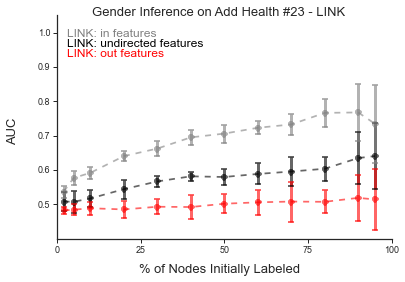

In [52]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter
fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')


for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.5,0.6,0.7,0.8,0.9,1]))

        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_ah_undirect, 
            yerr=se_micro_auc_ah_undirect, fmt='--o', capthick=2,
            alpha=0.6, elinewidth=3, color='black')
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_ah_in, 
            yerr=se_micro_auc_ah_in, fmt='--o', capthick=2,
            alpha=0.6, elinewidth=3, color='red')
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_ah_out,
            yerr=se_micro_auc_ah_out, fmt='--o', capthick=2,
            alpha=0.6, elinewidth=3, color='gray')
        
        
        grid[i].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


        grid[i].set_ylim(0.4,1.1)
        grid[i].set_xlim(0,100)
        grid[i].annotate('LINK: in features', xy=(3, 0.99), 
                 color='gray', alpha=1, size=12)

        grid[i].annotate('LINK: undirected features', xy=(3, 0.96), 
                 color='black', alpha=1, size=12)
        grid[i].annotate('LINK: out features', xy=(3, 0.93), 
                 color='red', alpha=1, size=12)

        grid[i].set_ylim(0.4,1.05)
        grid[i].set_xlim(0,100)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=9)
        grid[i].tick_params(axis='both', which='minor', labelsize=9)


fig.text(0.5, 0.9, 'Gender Inference on Add Health #' +str(id[0]) + ' - LINK', ha='center', fontsize=13)        
fig.text(0.5, 0.01, '% of Nodes Initially Labeled', ha='center', fontsize=13)
fig.text(0.01, 0.5, 'AUC', va='center', rotation='vertical', fontsize=13)

pp = PdfPages('../../AddHealth_School_23_LINK_Inference.pdf')
pp.savefig()
pp.close()